In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def make_fig(X, Vt, title):
    plt.rcParams['figure.figsize'] = [7, 7]
    sns.set_theme()
    gfg = sns.scatterplot(x=X[:,0], y=X[:,1])
    plt.arrow(0, 0, -0.3 * Vt[0, 0], -0.3 * Vt[0, 1], width=0.1, color='red')
    plt.arrow(0, 0, 0.3 * Vt[1, 0], 0.3 * Vt[1, 1], width=0.1, color='purple')
    gfg.set_ylim(-5, 5)
    gfg.set_xlim(-5, 5)
    gfg.set_xlabel("x-coordinates ", fontsize = 20)
    gfg.set_ylabel("y-coordinates ", fontsize = 20)
    gfg.set_title(title, fontsize = 20)
    plt.gca().set_aspect(1)

In [3]:
def make_fig_projected(X, title):
    sns.set_theme()
    gfg = sns.scatterplot(x=X[:,0], y=X[:,1])
    gfg.set_ylim(-5, 5)
    gfg.set_xlim(-5, 5)
    gfg.set_xlabel("PC1", fontsize = 20)
    gfg.set_ylabel("PC2", fontsize = 20)
    gfg.set_title(title, fontsize = 20)
    plt.gca().set_aspect(1)

In [4]:
def line_plot(data, title):
    sns.set_theme()
    gfg = sns.scatterplot(x=data, y=np.array([0,0,0,0,0]))
    gfg.set_ylim(-0.25, 0.25)
    gfg.set_xlim(-5, 5)
    gfg.set_ylabel(title, fontsize = 15, rotation=0)
    plt.gca().set_aspect(1)
    gfg.yaxis.labelpad = 0
    gfg.set(yticklabels=[]);

In [5]:
x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([1,2,3,4,5]).reshape(-1,1)
X = np.concatenate((x, y), axis=1)

x_o = np.array([1,2,3,1,5]).reshape(-1,1)
y_o = np.array([1,2,3,-1.5,5]).reshape(-1,1)
X_outliers = np.concatenate((x_o, y_o), axis=1)

In [6]:
X = X - np.mean(X, axis=0)
U, S, Vt = np.linalg.svd(X, full_matrices = False)
Vt

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [7]:
projected_data = X @ Vt.T

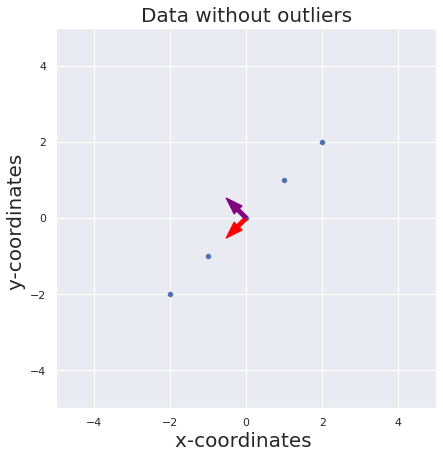

In [8]:
make_fig(X, Vt, "Data without outliers")

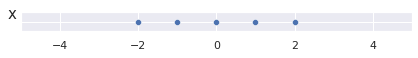

In [9]:
line_plot(X[:,0], "x")

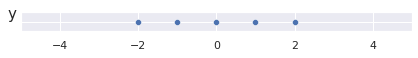

In [10]:
line_plot(X[:,1], "y")

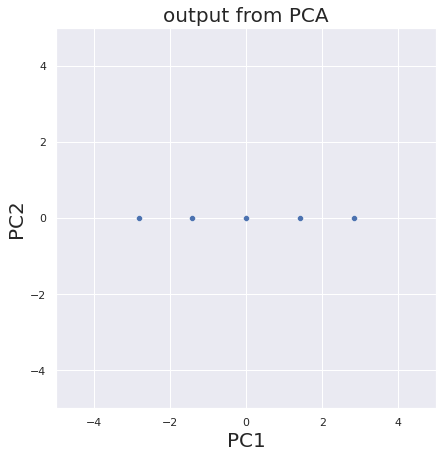

In [11]:
make_fig_projected(projected_data, "output from PCA")

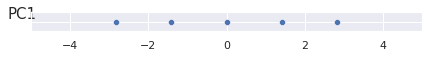

In [12]:
line_plot(projected_data[:,0], "PC1")

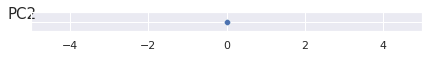

In [13]:
line_plot(projected_data[:,1], "PC2")

In [14]:
X_outliers = X_outliers - np.mean(X_outliers, axis=0)
U2, S2, Vt2 = np.linalg.svd(X_outliers, full_matrices = False)
Vt2

array([[ 0.55771991,  0.83002922],
       [ 0.83002922, -0.55771991]])

In [15]:
projected_data = X_outliers @ Vt2.T
projected_data

array([[-1.52783417, -0.66009298],
       [-0.14008504, -0.38778368],
       [ 1.24766408, -0.11547437],
       [-3.60290721,  0.7342068 ],
       [ 4.02316234,  0.42914423]])

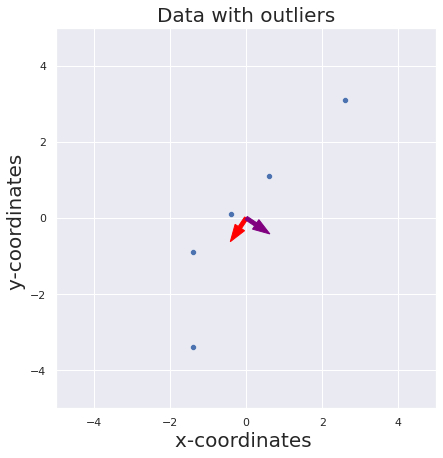

In [16]:
make_fig(X_outliers, Vt2, "Data with outliers")

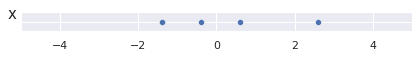

In [17]:
line_plot(X_outliers[:,0], "x")

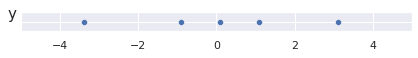

In [18]:
line_plot(X_outliers[:,1], "y")

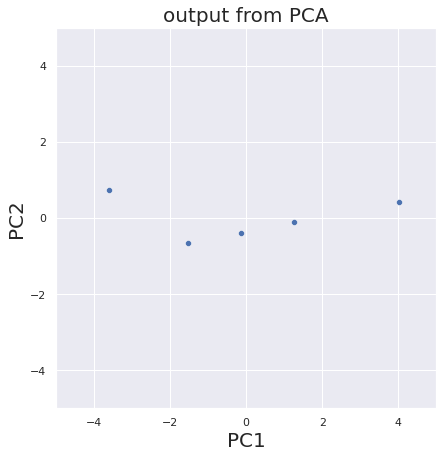

In [19]:
make_fig_projected(projected_data, "output from PCA")

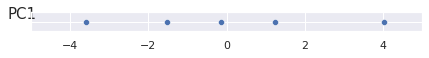

In [20]:
line_plot(projected_data[:,0], "PC1")

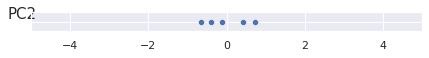

In [21]:
line_plot(projected_data[:,1], "PC2")

# RPCA

In [22]:
def shrink(X,tau):
    Y = np.abs(X)-tau
    return np.sign(X) * np.maximum(Y,np.zeros_like(Y))
def SVT(X,tau):
    U,S,VT = np.linalg.svd(X,full_matrices=0)
    out = U @ np.diag(shrink(S,tau)) @ VT
    return out
def RPCA(X):
    n1,n2 = X.shape
    mu = n1*n2/(4*np.sum(np.abs(X.reshape(-1))))
    lambd = 1/np.sqrt(np.maximum(n1,n2))
    thresh = 10**(-7) * np.linalg.norm(X)
    
    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0
    while (np.linalg.norm(X-L-S) > thresh) and (count < 1000):
        L = SVT(X-S+(1/mu)*Y,1/mu)
        S = shrink(X-L+(1/mu)*Y,lambd/mu)
        Y = Y + mu*(X-L-S)
        count += 1
    return L,S

In [23]:
L,S = RPCA(X)
L

array([[-2., -2.],
       [-1., -1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.]])

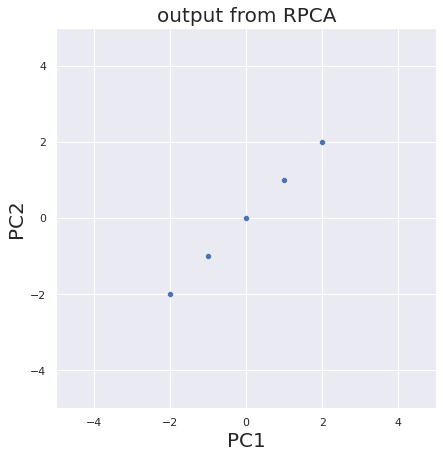

In [24]:
make_fig_projected(L, "output from RPCA")

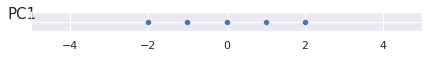

In [25]:
line_plot(L[:,0], "PC1")

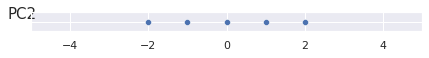

In [26]:
line_plot(L[:,0], "PC2")

In [27]:
L2,S2 = RPCA(X_outliers)
L2

array([[-0.85941598, -0.8999998 ],
       [ 0.03292945,  0.03448446],
       [ 0.60000049,  0.62833405],
       [-1.4       , -1.46611158],
       [ 1.42757837,  1.49499227]])

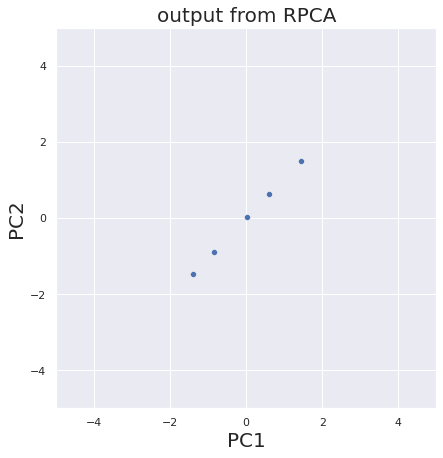

In [28]:
make_fig_projected(L2, "output from RPCA")

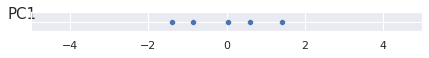

In [29]:
line_plot(L2[:,0], "PC1")

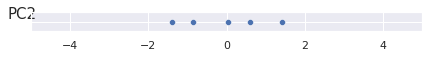

In [30]:
line_plot(L2[:,0], "PC2")